# Lesson 3: Data Preparation
<b><u>Instructors</b></u>: Ishan Mishra, Phil Culliton


<br>
Data preparation is particularly important when doing Remote Data Science and Machine Learning. This is because the data scientist doesn't inherently have the ability to freely check how clean the data is, and whether it needs pre-processing. As such, the responsibility falls onto the Data Owner to ensure the data is clean, annotated, and usable.


In this notebook, you'll walk in the steps of a Data Owner (someone who has new and potentially sensitive information) and learn about:
<ul>
    <li> Data Acquisition </li>
    <li> Quality Checks </li>
    <li> Annotation </li>
    <li> Converting your data to a PyGrid compatible format </li>
    <li> How to load data into the node </li>
    <li> Linking data from multiple sources </li>
</ul>


Let's get started!

<hr>

### Here's what you'll need to install for this lesson

In this lesson, we'll be using the new library `matplotlib`. If you haven't already, please install it using:

`conda install matplotlib`

## 3.1 Data Acquisition!

Data Acquisition focuses on generating and capturing data into a system. Broadly speaking, it's made up of two phases: <b> data harvesting</b>, and <b>data ingestion</b>. The former, we'll cover in this lesson, and the latter, we'll show you over the next two lessons.

### 3.1.1 Data Harvesting

In this course, we're using generated or pre-gathered datasets, but in the real world data comes in many forms and contexts - we'll cover some in the next section. How do you get your own data? The phrase "data harvesting" might sound like a callback to movies about robotic uprisings, but the wording is truly operative! In this process we are:

1. Identifying sources of potentially fruitful data
2. Building a process to gather it
3. Running that process
4. Carefully checking the outcomes
5. Putting the data in a shareable format
6. Delivering the data to intended recipient

Thinking of the data gathering process as akin to a farmer's harvest is actually a useful framing of the relevant tasks and problems.

- There may be better sources of data
- The data may be flawed or need care and pruning
- The data and format should align with the intended recipient's needs
- etc.

The key problem here, however, is `Is this the data that we need?` No amount of harvesting improvements or fancy formatting can solve for data that doesn't suit the problem you're trying to solve in some key aspect. To help with this, let's consider some useful ways to think about data.

### 3.1.2 The 4 V's of Data 

When it comes to thinking about data, there are usually four major things to think about, commonly referred to in the industry as the 4 V's of data. They are:

<ol>
<li><b> Volume </b> refers to the quantity or amount of data in question.
An example of low volume: if you're collecting sensitive data about people with a rare condition.
An example of high volume would be most social media applications that you've heard of. For instance, Facebook has more users than China has people. And each of those people are making posts, uploading pictures, liking content- that adds up to trillions of photos that they can use for data science and machine learning. </li>
<br>
<li><b> Velocity </b> refers to the rate at which new data is being gathered or collected.
For instance, if you're a company, performance reviews might only come once a quarter.
But if you're YouTube, then in one day, you have over 700,000 hours of new videos added. For context, that's longer than the average human lifespan. So if a new person was born tomorrow, and they spent every moment of their life just trying to watch the YouTube videos uploaded on the day they were born, on average they wouldn't be able to get through them all. </li>
<br>
<li><b> Variety </b> refers to the diversity of the data that's being collected. For example, think of the difference between a dataset consisting of polls, and a dataset consisting of emails. No two emails are necessarily quite the same. They could contain quite literally, anything- text about anything, pictures of anything, attachments of any kind, etc. </li>
<br>

<li><b> Value </b> refers to the idea that not all kinds of data are of equal value. Let's say you're collecting medical images, and some of the images were corrupted during the acquisition process, and were blurry and grainy as a result. That data isn't quite as valuable as a pristine scan.</li>

### 3.1.3 Hands-on
In our case, let's say we use data concerning the number of COVID cases per country. Lets load it and take a look at the first few rows!

In [1]:
# Load data
import pandas as pd
raw_data = pd.read_csv("https://raw.githubusercontent.com/OpenMined/PySyft/dev/notebooks/course3/dataset/L3_data.csv")

In [2]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,1140,1113,3099,92,621,344,283,284,1095,44,...,515,207,722,401,234,521,284,465,522,1176
1,1140,1113,3099,92,621,344,283,284,1095,44,...,515,207,722,401,234,521,284,465,522,1176
2,1211,1378,2821,113,575,319,267,295,1167,52,...,577,231,655,449,224,600,224,577,492,1258
3,1238,1587,2356,107,520,265,296,316,1186,42,...,473,209,620,473,231,607,275,407,421,1109
4,1093,2075,2964,117,578,371,359,349,1151,48,...,550,227,648,447,232,563,188,338,432,1148


In this dataset, each column corresponds to a <b> country</b>, each row corresponds to a new <b> month </b> where data was collected, and each value in this DataFrame corresponds to the number of COVID19 cases in the country at the start of that month. 

So for instance, Country 0 had 1140 COVID cases at the start of when this data was collected (row 0), and only 451 when the data was last collected (row 53).

In [3]:
raw_data["0"][0], raw_data["0"][53]

(1140, 451)

<hr>

## 3.2 Quality Check
Checking the quality of a dataset can involve finding missing values, identifying outliers and anomalies (using methods such as an [Isolation Forest](https://scikit-learn.org/stable/auto_examples/ensemble/plot_isolation_forest.html) or [k-Nearest Neighbours](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)) or visualizing the dataset. 
It might also involve using external information that we know- for instance, about the sources or about how the data was collected.

Let's walk through an example using the dataset again:


In [4]:
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,1140,1113,3099,92,621,344,283,284,1095,44,...,515,207,722,401,234,521,284,465,522,1176
1,1140,1113,3099,92,621,344,283,284,1095,44,...,515,207,722,401,234,521,284,465,522,1176
2,1211,1378,2821,113,575,319,267,295,1167,52,...,577,231,655,449,224,600,224,577,492,1258
3,1238,1587,2356,107,520,265,296,316,1186,42,...,473,209,620,473,231,607,275,407,421,1109
4,1093,2075,2964,117,578,371,359,349,1151,48,...,550,227,648,447,232,563,188,338,432,1148


Now let's say, for instance, that when we were given the dataset, we were told that a lot of immigration and emmigration happened in the first month of this dataset, and as such a lot of double counting of COVID19 cases happened, and the global numbers of COVID19 were reported as twice of what they really were.

We could try to naively tackle this by just dividing the data from the first month by half. Let's try it out and see what happens!

In [5]:
# Divide the data from the first month by half
raw_data.iloc[0] /= 2

Now let's try to visualize the dataset and see if anything suspicious looking appears:

In [6]:
# See the resultant data
raw_data.head()

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,570,556.5,1549.5,46,310.5,172,141.5,142,547.5,22,...,257.5,103.5,361,200.5,117,260.5,142,232.5,261,588
1,1140,1113.0,3099.0,92,621.0,344,283.0,284,1095.0,44,...,515.0,207.0,722,401.0,234,521.0,284,465.0,522,1176
2,1211,1378.0,2821.0,113,575.0,319,267.0,295,1167.0,52,...,577.0,231.0,655,449.0,224,600.0,224,577.0,492,1258
3,1238,1587.0,2356.0,107,520.0,265,296.0,316,1186.0,42,...,473.0,209.0,620,473.0,231,607.0,275,407.0,421,1109
4,1093,2075.0,2964.0,117,578.0,371,359.0,349,1151.0,48,...,550.0,227.0,648,447.0,232,563.0,188,338.0,432,1148


Well that's odd- the data from the first month and second month appear to be exactly the same. If this happened to just one or two countries, that might be plausible, but for every country? That seems unlikely.

There likely was an error when transferring this data, and a duplication error occurred. We can fix this by simply removing the first month from our dataset, and starting our analysis from the second month (row 1 in the table above), and onwards.

In [7]:
# Remove duplicated row
raw_data.drop([0])

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
1,1140,1113.0,3099.0,92,621.0,344,283.0,284,1095.0,44,...,515.0,207.0,722,401.0,234,521.0,284,465.0,522,1176
2,1211,1378.0,2821.0,113,575.0,319,267.0,295,1167.0,52,...,577.0,231.0,655,449.0,224,600.0,224,577.0,492,1258
3,1238,1587.0,2356.0,107,520.0,265,296.0,316,1186.0,42,...,473.0,209.0,620,473.0,231,607.0,275,407.0,421,1109
4,1093,2075.0,2964.0,117,578.0,371,359.0,349,1151.0,48,...,550.0,227.0,648,447.0,232,563.0,188,338.0,432,1148
5,966,2269.0,3390.0,135,614.0,432,341.0,428,1107.0,49,...,285.0,189.0,640,398.0,250,535.0,183,382.0,459,1181
6,758,2430.0,3575.0,178,802.0,511,330.0,552,1046.0,43,...,248.0,167.0,608,471.0,266,570.0,130,360.0,495,1173
7,858,2709.0,4260.0,180,696.0,455,347.0,488,1014.0,42,...,260.0,194.0,529,464.0,258,458.0,100,288.0,424,1197
8,877,2556.0,4860.0,178,747.0,309,458.0,457,1000.0,46,...,247.0,190.0,412,436.0,250,411.0,107,450.0,440,1193
9,925,2765.0,4145.0,251,770.0,283,462.0,495,1131.0,46,...,349.0,177.0,371,434.0,205,419.0,114,509.0,458,1224
10,629,3071.0,5022.0,259,775.0,287,507.0,438,1207.0,62,...,228.0,197.0,418,512.0,206,348.0,75,490.0,486,1337


At this point, we might decide to visualize our dataset and see if there are any obvious outliers or anomalies. Let's look at the first country!

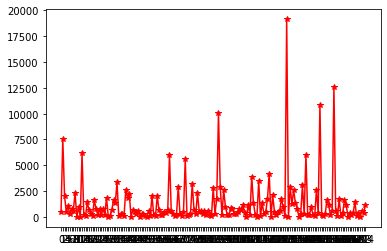

In [8]:
import matplotlib.pyplot as plt
plt.plot(raw_data.T[24], "r-*")

In [9]:
raw_data.T[0].shape[0]

175

In [10]:
def plot_extrapolated_country(idx):
    x = list(range(54))
    y = raw_data.T[idx]
    
    plt.plot(y)
    
    for x1, y1 in zip(x, y):
        plt.plot(x1, y1) #, 'ro')

    z = np.polyfit(x, y, 2)
    f = np.poly1d(z)

    new_points = range(12)
    for x2 in new_points:
        plt.plot(55 + x2, f(55 + x2), 'bo')

TypeError: expected x and y to have same length

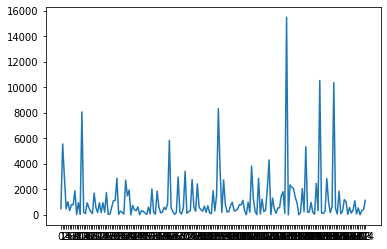

In [13]:
plot_extrapolated_country(22)

In [14]:
thingies = []
for i in range(raw_data.T.shape[0]):
    x = range(54)
    y = raw_data.T[i]
    slope, intercept = np.polyfit(x, y, 1)
    thingies.append(slope) #raw_data.T[i, -1] - raw_data.T[i, 0])
    
thingies.index(max(thingies))

TypeError: expected x and y to have same length

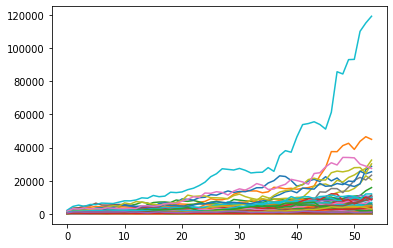

In [15]:
pd.DataFrame(raw_data).plot(legend=False)

This seems alright, and doesn't seem to have any clear outliers or anomalies. We could do this for other countries, and maybe even employ other visualization methods such as clustering or PCA, depending on the type of data we're working with.

<hr>

## 3.3. Data Annotation

In many cases, it's not just data that we need. It's annotated, or in other words, <b> labelled </b> data. For example, let's say I wanted to train a Neural Network to classify images of lungs based on whether or not the person had a healthy lung. Having the images alone wouldn't be enough; I'd also need a way of knowing which image corresponded to a healthy lung, and which ones don't.

There are other kinds of annotation as well, such as semantic segmentation, bounding boxes, landmark and keypoint, and others. We won't go into too much detail about these, but feel free to check out some of the external resources and references at the bottom of this notebook!

### 3.3.1 Common annotation types

Most often annotations (or *labels*) will take the form of:
1. Binary values (true or false)
2. Classes (discrete states of being - cat or dog or airplane)
3. Continuous values (population counts, dollars and cents, stock market returns)

In the data we're using here, we've got a good example of number 3 - population counts. While it is bounded by physical realities, in theory it could be any number between -infinity and +infinity. A machine learning model would need to be able to predict anything in that range.

Binary values and classes are considerably more constrained - while some multi-class problems have thousands (or millions!) of classes, they are all discrete and map to defined states.

### 3.3.2 Creating annotations

The process of labelling can be very simple, or very complex, depending on the nature of the annotations. For example, the annotations mentioned at the top of this section - healthy or unhealthy lungs - would most likely need to be:

1. Diagnosed by a radiologist (or several radiologists)
2. Recorded (and adjudicated when several radiologists were involved)
3. Checked for accuracy

More complex annotations (like identifying features of an unhealthy lung) would require bounding boxes or segmentations to be drawn as well, which would need to go through the same process.

On the other hand, dog vs. cat labels might be applied very quickly, using an automated system or by having humans hand-label them.

<hr>

## 3.4. Data and PyGrid

As mentioned earlier in the course, PyGrid is the library we've made that lets you deploy nodes and conduct remote data science. Currently, we primarily support data in the form of NumPy arrays; however, we plan to expand this further. Additionally, many common data science formats are easily convertible to NumPy arrays, such as Pandas DataFrames, Tensorflow or PyTorch tensors, etc.

In [15]:
# Convert a Pandas Dataframe to NumPy array
print(f'raw_data is of type: {type(raw_data)}')
raw_data = raw_data.values
print(f'raw_data is of type: {type(raw_data)}')

raw_data is of type: <class 'pandas.core.frame.DataFrame'>
raw_data is of type: <class 'numpy.ndarray'>


In [16]:
# Convert a PyTorch Tensor to a NumPy array
import torch
test_data = torch.Tensor([1, 2, 3, 4, 5])
print(f'test_data is of type: {type(test_data)}')
test_data = test_data.numpy()
print(f'test_data is of type: {type(test_data)}')

test_data is of type: <class 'torch.Tensor'>
test_data is of type: <class 'numpy.ndarray'>


Additionally, to make use of Differential Privacy, the current version of PySyft (0.6.0) supports NumPy arrays having the np.int32 datatype. You can initialize a NumPy array to have this datatype as shown below: 

In [17]:
import numpy as np
some_data = np.ndarray([1, 0, 1, 0, 1, 0], dtype=np.int32)

You can also convert other NumPy arrays to the np.int32 datatype using the astype() method, as shown below:

In [18]:
random_data = np.random.random((5, 5)) * 10
print(f'random_data is of dtype: {random_data.dtype}')
random_data = random_data.astype(np.int32)
print(f'random_data is now of type: {random_data.dtype}')

random_data is of dtype: float64
random_data is now of type: int32


<hr>

## 3.5. Differential Privacy & Datasets

### 3.5.1. A Primer on Differential Privacy

You were introduced to the idea(s) behind Differential Privacy (DP) in Lesson 1. Feel free to go back to the video if you need a refresher!

### 3.5.2. DP Metadata needed for PyGrid

We've made it pretty simple to use PyGrid for Data Owners who want their data to be protected with DP; you only need to add 3 simple pieces of metadata:
* min_val
* max_val
* entitities

min_val and max_val correspond to the lowest and highest values found in the dataset. Ideally, they'd be data independent; so for instance, if you had regular .png images, the min_val could be 0 and the max_val could be 255, since a pixel value in that format can't go higher than that. If your dataset consisted of ages of various people, the min_val might be 0 years old, and the max_val might be 120 years old (the highest age any human being has ever reached).

The tighter these bounds are, the more accurate and less privacy budget will be lost when a data scientist performs a computation with the data.

On the other hand, entities corresponds to the Data Subjects; i.e. the people whose data is in the dataset, whose privacy we're protecting using Differential Privacy.


Annotating data with DP Metadata is pretty straight forward. We start by importing the PySyft library, and then by calling .private() to the end of your Syft Tensor, as shown below:

In [19]:
import syft as sy

# select all of Country 0's data
country0_data = raw_data[1:, :]

# Specify it to be a np.int32 dtype
country0_data = country0_data.astype(np.int32)

# Create an Entity or Data Subject corresponding to country1
from syft.core.adp.entity import Entity
country0 = Entity(name="Country 0")

# Create a Syft tensor
data = sy.Tensor(country0_data)

# Add DP metadata
data = data.private(min_val=0, max_val=150000, entities=country0)

Now that we're familiar with how to do this, let's repeat this process for all the Countries in our dataset.

In [23]:
dataset = {"Country 0" : data}
entities = []
for i in range(raw_data.shape[-1]):
    country_name = f"Country {i}"
    
    # Create a new Entity correspoinding to the country and add it to the list
    new_entity = Entity(name=country_name)
    entities.append(new_entity)
    
    # Add it to the Dataset Dictionary
    dataset[country_name] = sy.Tensor(raw_data[:, i].astype(np.int32)).private(min_val=0, max_val=150000, entities=new_entity)

### 3.5.3. Loading the data to PyGrid!

Once the appropriate data, metadata, and labels are prepared, uploading the data to your domain node is as simple as running a simple command:

In [24]:
# Login to Domain Node
domain_node = sy.login(email="info@openmined.org", password="changethis", port=8081)

# Upload the dataset!
domain_node.load_dataset(
    assets=dataset, 
    name="COVID19 Cases in 175 countries", 
    description="Weekly data for an entire year", 
    metadata="Any metadata you'd like to include goes here"
)

Connecting to http://localhost:8081... done! 	 Logging into new_phil_node... done!
Loading dataset... checking dataset name for uniqueness.......

WARNING - Dataset Name Conflict: A dataset named 'COVID19 Cases in 175 countries' already exists.



Do you want to upload this dataset anyway? (y/n) y



Loading dataset... uploading... SUCCESS!                                                                                                                                      

Run <your client variable>.datasets to see your new dataset loaded into your machine!


Notes:
* PyGrid will raise a warning if the data you've uploaded isn't compatible with the Differential Privacy framework we've made.

In [25]:
domain_node.datasets

<hr>

## 3.6. Linking Data From Multiple Sources

In this course, we'll be using the PySyft and PyGrid frameworks to link data from multiple sources (called nodes). This is both really cool and very useful because it lets us perform data science and machine learning on private data on someone else's machine or server, without compromising the privacy of anyone in the dataset.


In remote data science, because there's a high likelihood that all of our data is not coming from the same source, proper data annotation and cleaning becomes particularly important. This is an important distinction, because:
* Different sources may generate data at different rates; some sources stream data whereas others produce data in batches (i.e. in a periodic manner, or at a certain time interval)
* Different sources may also have different measuring capabilities, and this might affect the reliability of a dataset. 
* Different nodes may have different privacy budgets alloted to their respective datasets, which means some datasets may be seen and used much less than others.

<b> DID YOU KNOW? </b> A historical example of data sources having different measuring capabilities were the Geiger counters used in Chernobyl. <p>Immediately after the Chernobyl nuclear accident, many people at the time weren't too concerned because measurements from their Geiger counters showed a measurement of 3.6 Roentgen/hour- the equivalent measurement of 10 X-rays. However, it was later discovered that the Geiger counters in use had a maximum detection limit and sensitivity which meant they couldn't detect or measure radiation amounts higher than 3.6 Roentgen per hour. 
    
When new, higher range Geiger counters were used, it was quickly (and shockingly) realized that the radiation being leaked wasn't 3.6 R/h, but around 5.6 R per SECOND. This was the equivalent of 2 Hiroshima nuclear bombs worth of radiation being released per hour.</p>

Although this is an extreme example, it shows the importance of proper data acquisition and annotating data. Had the authorities known the differences of their data sources at the time, they might have intervened and helped out sooner, and could have saved countless more lives.

<hr>

## Additional Resources and References

<ul><li> Lyko K., Nitzschke M., Ngonga Ngomo AC. (2016) Big Data Acquisition. In: Cavanillas J., Curry E., Wahlster W. (eds) New Horizons for a Data-Driven Economy. Springer, Cham. <a> https://doi.org/10.1007/978-3-319-21569-3_4 </a> </li>
    <li> <a href="https://www.oreilly.com/library/view/implementing-a-smart/9781491983492/"> Implementing a Smart Data Platform, O'Reilly Media 2017 </a> </li>
    <li> <a href="https://www.oreilly.com/library/view/python-data-cleaning/9781800565661/"> Python Data Cleaning, O'Reilly Media 2020 </a></li>
    <li> <a href="https://ai.googleblog.com/2020/02/open-images-v6-now-featuring-localized.html"> Examples of Image Annotation Types </a></li>
    <li> <a href="https://developers.google.com/machine-learning/glossary#label"> Good description of annotations / labels </a></li>
</ul>

<hr>

<hr>